In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from subtle.subtle_io import load_h5_file
from subtle.data_loaders import SliceLoader
import subtle.subtle_loss as suloss
from subtle.subtle_preprocess import enhancement_mask, enh_mask_smooth
import sigpy.plot as pl


(196, 3, 240, 240) (196, 3, 240, 240)


<IPython.core.display.Javascript object>


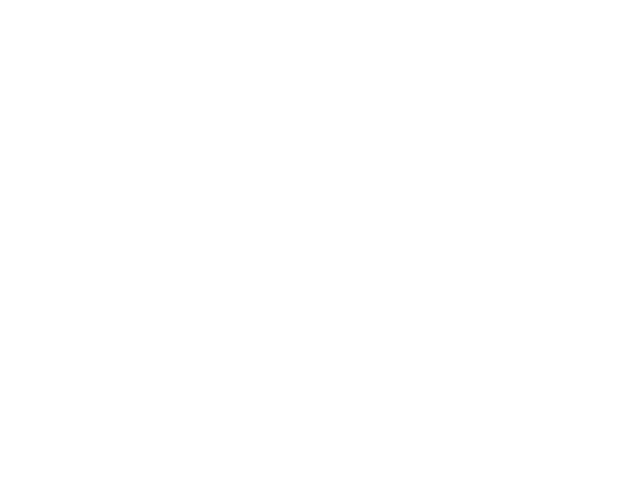

<IPython.core.display.Javascript object>


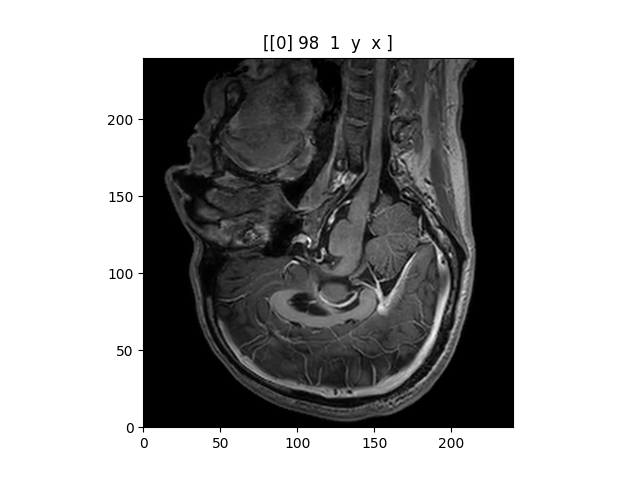

In [3]:
fpath_h5 = '/raid/jon/data_full_tiantan_nohist/data/NO26.h5'
data = load_h5_file(fpath_h5, h5_key='data')
data_mask = load_h5_file(fpath_h5, h5_key='data_mask')
print(data.shape, data_mask.shape)

plt.figure()
pl.ImagePlot(np.stack((data, data_mask)))

In [4]:
def scurve(x):
    y = .5 * (1 + 2 * x / (1 + x **2))
    y[np.where(x <= -1)] = 0
    y[np.where(x >= 1)] = 1
    return y


def crop_fun(crth, val):
    return scurve(np.sqrt(val) - crth)  / (1 - crth)

<IPython.core.display.Javascript object>


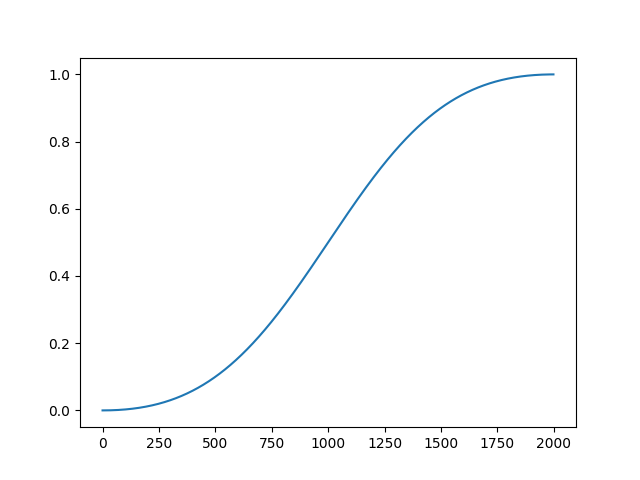

<IPython.core.display.Javascript object>


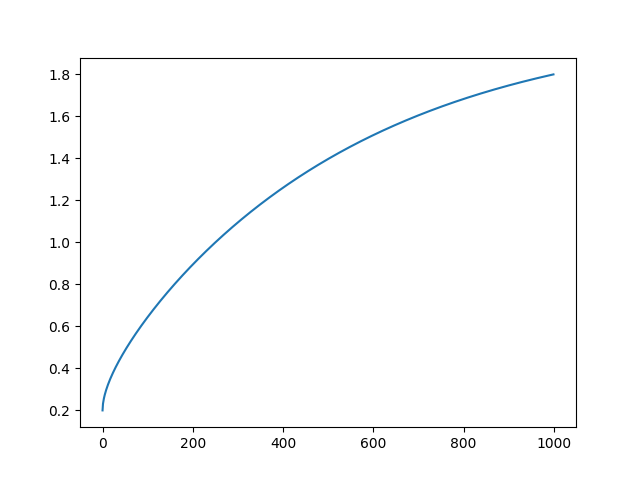

In [5]:
plt.figure()
plt.plot(scurve(np.arange(-1, 1, .001)))

plt.figure()
plt.plot(crop_fun(.5, np.arange(0, 1, .001)))

16.509466


<IPython.core.display.Javascript object>


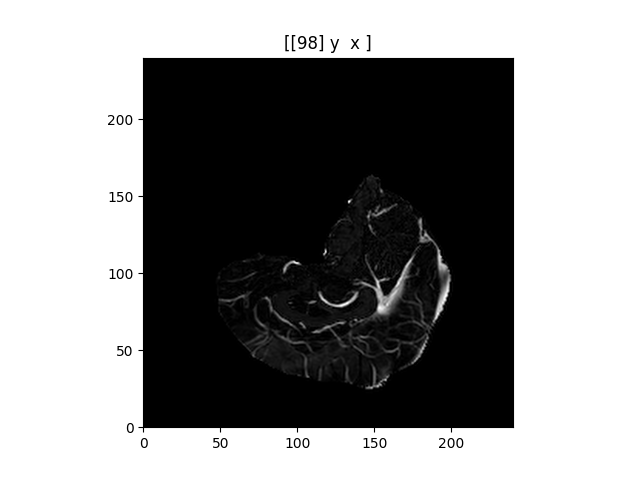

In [7]:
im_diff = data_mask[:,2,...] - data_mask[:,0,...]
im_diff_max = np.max(abs(im_diff))
print(im_diff_max)
pl.ImagePlot(im_diff)

<IPython.core.display.Javascript object>


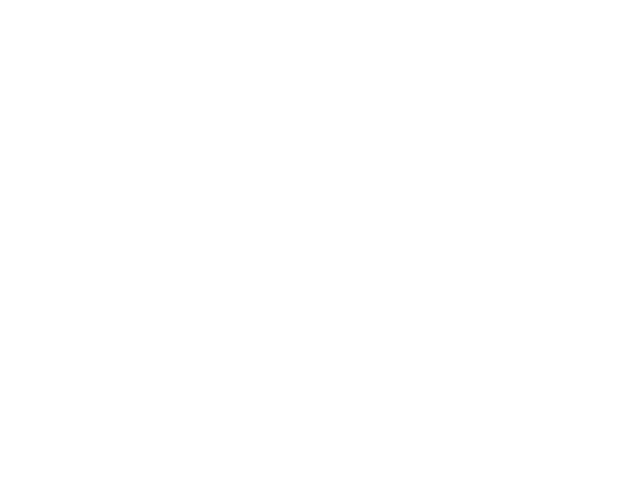

<IPython.core.display.Javascript object>


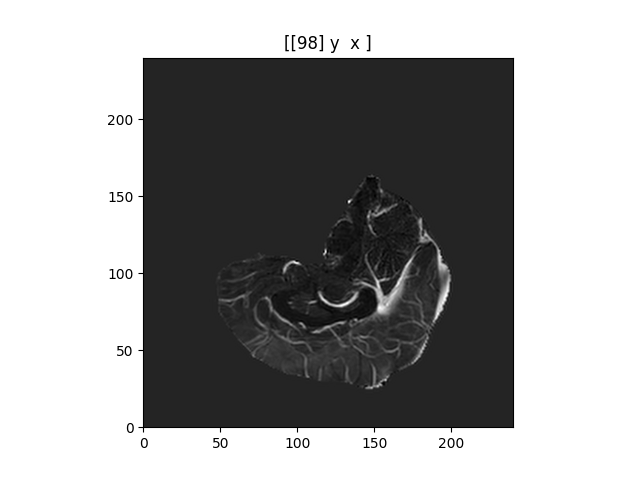

In [8]:
th = .05 * im_diff_max
enh_mask = (im_diff - np.min(im_diff)) / np.max(im_diff)
enh_mask = enh_mask ** 1


# enh_mask2 = crop_fun(abs(im_diff)/im_diff_max, abs(im_diff))
plt.figure()
pl.ImagePlot(enh_mask)

(196, 1, 1, 240, 240)


<IPython.core.display.Javascript object>


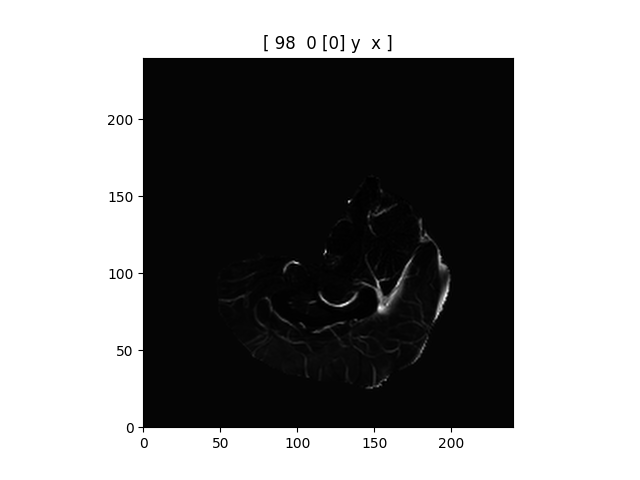

In [24]:
X = data_mask[:,:2,...][:,None,...]
Y = data_mask[:,-1,...][:,None,None,...]
print(Y.shape)
enh_mask0 = enhancement_mask(X, Y, center_slice=0)
enh_mask0 = enh_mask_smooth(X, Y, center_slice=0, p=3)
pl.ImagePlot(enh_mask0)